In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [321]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [322]:
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    continue
  else:
    print(df[col].value_counts())

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64
Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64
A Stage
Regional    3932
Distant       92
Name: count, dtype: int64
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int

In [323]:
y = df[['Status']]
x = df.drop(["Status"], axis= 1)

In [324]:
x.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')

In [325]:
y.columns

Index(['Status'], dtype='object')

# Encode

In [326]:
le = LabelEncoder()
one = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [327]:
y = le.fit_transform(y)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [328]:
cat_cols = x.select_dtypes(include=['object', 'category']).columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns

In [329]:
print(cat_cols)
print(num_cols)

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status'],
      dtype='object')
Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')


In [330]:
# x = one.fit_transform(x[cat_cols])

In [331]:

x = pd.get_dummies(x)


In [332]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size=.2)

In [333]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10)

In [334]:
model = dt.fit(x_train, y_train)

In [335]:
model.score(x_train, y_train)

0.947188567878223

In [336]:
model.score(x_test, y_test)

0.8968944099378882

In [337]:
y_pred = model.predict(x_test)

In [338]:
accuracy = accuracy_score(y_test, y_pred)

In [339]:
accuracy

0.8968944099378882

In [340]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       685
           1       0.70      0.54      0.61       120

    accuracy                           0.90       805
   macro avg       0.81      0.75      0.78       805
weighted avg       0.89      0.90      0.89       805



In [341]:
confusion = confusion_matrix(y_test , y_pred)
confusion

array([[657,  28],
       [ 55,  65]])

<Axes: >

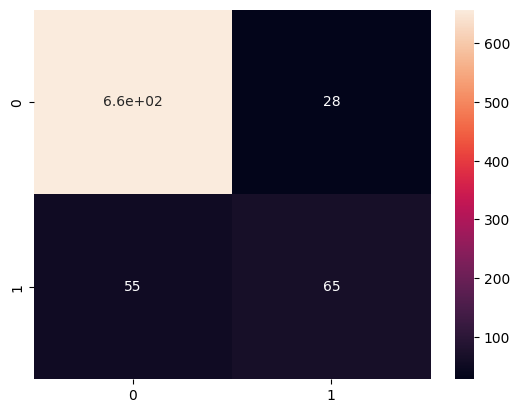

In [342]:
sns.heatmap(confusion, annot=True)

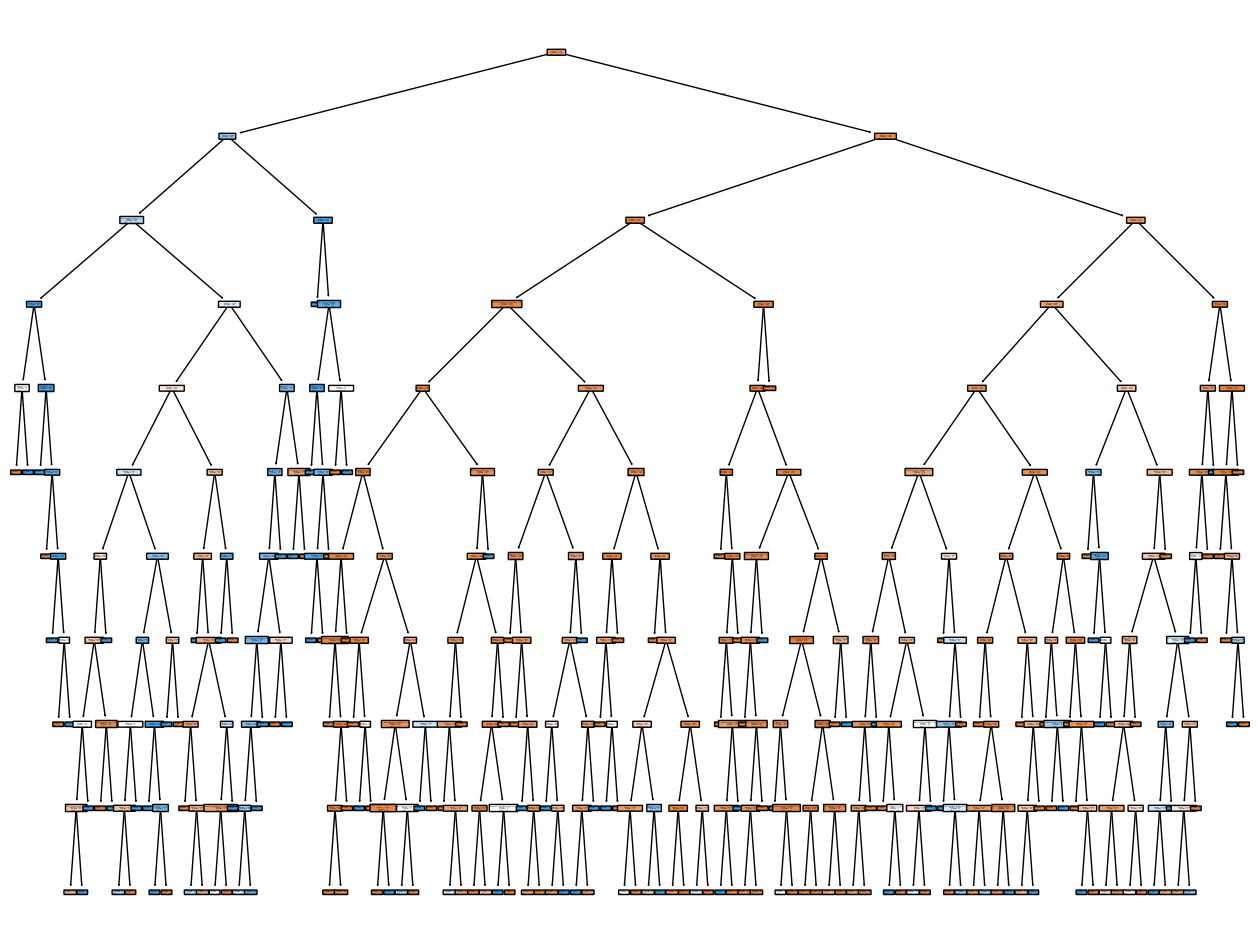

In [343]:
plt.figure(figsize=(16,12))
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)
plt.show()